In [26]:
import duckdb
from pathlib import Path

db_path = Path("/Users/evamaiwinston/ds3022/heat-grid-analysis") / "heatgrid.duckdb"

con = duckdb.connect(str(db_path), read_only=True)


In [27]:
con.execute("SHOW TABLES").df()

,name
0,base_combine
1,eia_hourly_raw
2,eia_load_hourly
3,noaa_hourly_avg
4,noaa_hourly_raw
5,noaa_hourly_temp


In [21]:
con.execute("SELECT * FROM base_combine LIMIT 50").df()

,hour_utc,location,temp,load_mwh
0,2019-01-01 00:00:00,BOS,4.750000,5077.0
1,2019-01-01 00:00:00,IAD,7.800000,11790.0
2,2019-01-01 00:00:00,LAX,15.600000,10287.0
3,2019-01-01 00:00:00,NYC,6.700000,8922.0
4,2019-01-01 01:00:00,BOS,3.300000,4857.0
5,2019-01-01 01:00:00,IAD,7.800000,11459.0
6,2019-01-01 01:00:00,LAX,15.000000,11039.0
7,2019-01-01 01:00:00,NYC,7.200000,8608.0
8,2019-01-01 02:00:00,BOS,2.800000,4658.0
9,2019-01-01 02:00:00,IAD,6.950000,10924.0


In [28]:
con.execute("""
    SELECT location, COUNT(*) AS rows
    FROM base_combine
    GROUP BY location
    ORDER BY rows DESC;   
""").df()

,location,rows
0,BOS,58313
1,NYC,58293
2,LAX,58173
3,IAD,58096


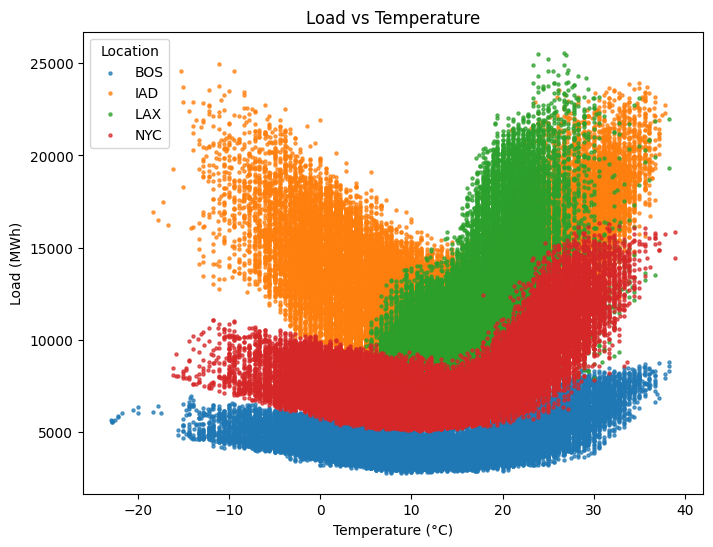

In [32]:
import matplotlib.pyplot as plt

df = con.execute("SELECT * FROM base_combine").df()

plt.figure(figsize=(8,6))

for loc in df["location"].unique():
    sub = df[df["location"] == loc]
    plt.scatter(sub["temp"], sub["load_mwh"], s=5, alpha=0.7, label=loc)

plt.xlabel("Temperature (°C)")
plt.ylabel("Load (MWh)")
plt.title("Load vs Temperature")
plt.legend(title="Location")
plt.show()

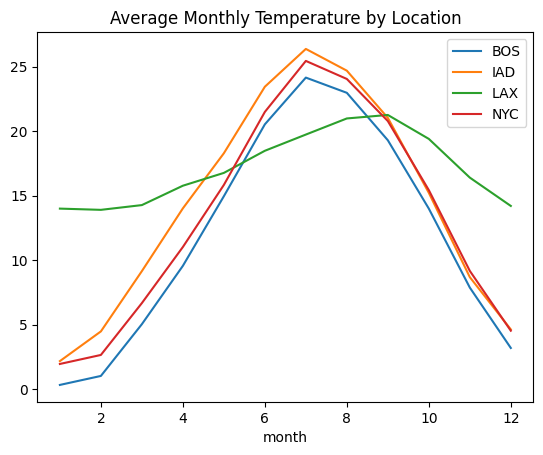

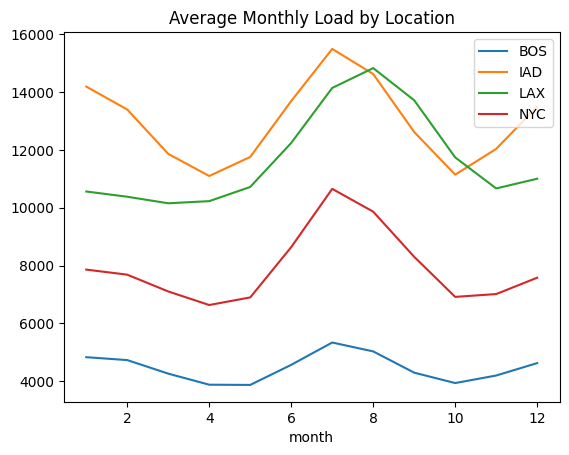

In [35]:
df["month"] = df["hour_utc"].dt.month

for loc in df["location"].unique():
    sub = df[df["location"] == loc]
    sub.groupby("month")["temp"].mean().plot(label=loc)

plt.legend()
plt.title("Average Monthly Temperature by Location")
plt.show()

for loc in df["location"].unique():
    sub = df[df["location"] == loc]
    sub.groupby("month")["load_mwh"].mean().plot(label=loc)

plt.legend()
plt.title("Average Monthly Load by Location")
plt.show()

In [25]:
con.close()
